##CIFAR 10

#### IMPORTANDO LIBRERIAS

In [1]:
from keras.datasets import cifar10
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

#### DESCARGANDO CIFRAR10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


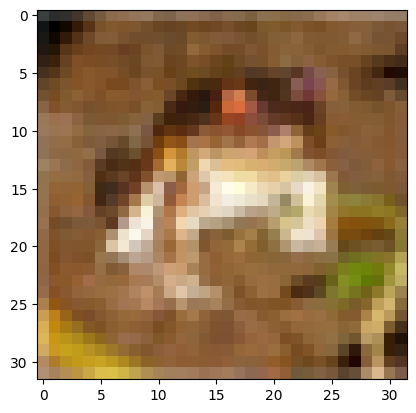

In [3]:
plt.imshow(x_train[0])

#### NORMALIZACIÓN DE LOS DATOS

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


#### VECTOR ONE HOT-ENCONDING

In [6]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


#### ARQUITECTURA DE LA RED

In [7]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

print(input_shape)
print(num_classes)

(32, 32, 3)
10


In [8]:
def model():# 32x32
  model = Sequential()
  model.add(Conv2D(32,(5,5), input_shape=input_shape, activation='relu'))#28x28
  model.add(Conv2D(32,(3,3), activation='relu'))#26x26
  model.add(MaxPooling2D(pool_size=(2,2)))#13x13

  model.add(Conv2D(32,(3,3), activation='relu'))#11x11
  model.add(MaxPooling2D(pool_size=(2,2)))#5x5

  model.add(Dropout(0.3))
  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  return model

In [9]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0

#### ENTRENAMIENTO DE LA RED

In [10]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 35, batch_size=32, shuffle=True)

Epoch 1/35
1563/1563 [==============================] - 19s 6ms/step - loss: 1.7927 - accuracy: 0.3355 - val_loss: 1.5235 - val_accuracy: 0.4346
Epoch 2/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4661 - accuracy: 0.4672 - val_loss: 1.3132 - val_accuracy: 0.5284
Epoch 3/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3068 - accuracy: 0.5315 - val_loss: 1.2035 - val_accuracy: 0.5792
Epoch 4/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1957 - accuracy: 0.5742 - val_loss: 1.0954 - val_accuracy: 0.6139
Epoch 5/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1067 - accuracy: 0.6099 - val_loss: 1.0407 - val_accuracy: 0.6381
Epoch 6/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0272 - accuracy: 0.6386 - val_loss: 1.0154 - val_accuracy: 0.6443
Epoch 7/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9711 - accuracy: 0.6559 - val_loss: 1.0449 - val_accuracy

In [11]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)

[0.9815412163734436, 0.7024999856948853]


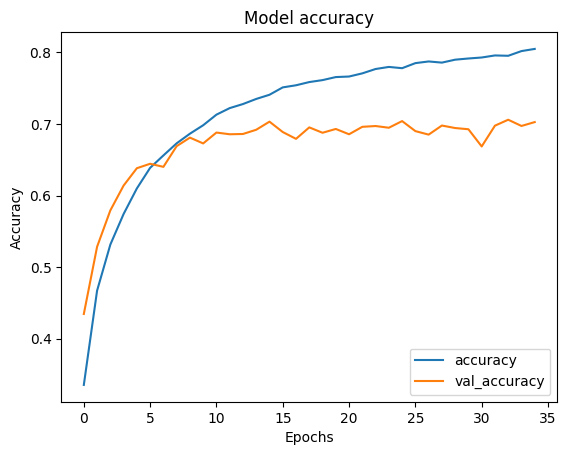

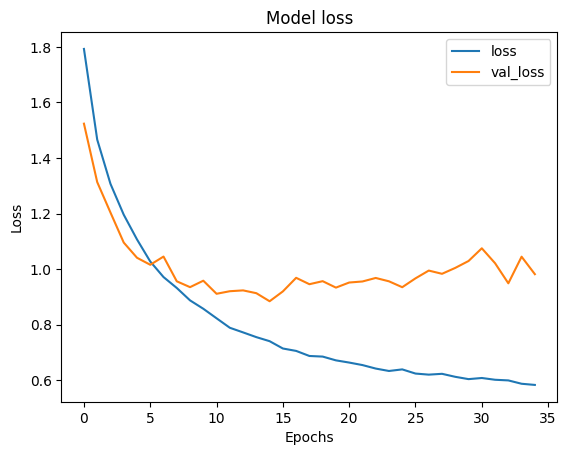

In [12]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

#### MATRIZ DE CONFUSION

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.4118213e-04 2.5870631e-04 1.5931953e-02 1.9133611e-01 2.8614762e-01
 4.5982325e-01 3.7683893e-02 7.7761188e-03 6.0413027e-04 2.9699941e-04]


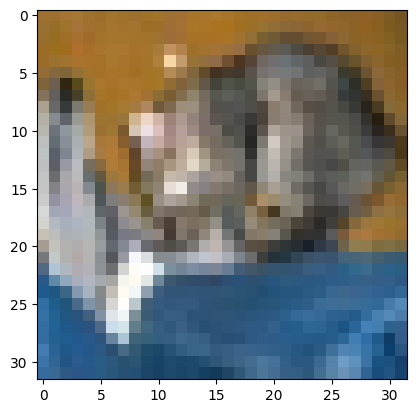

In [13]:
from sklearn.metrics import confusion_matrix

outputTest = model.predict(x_test)
print(outputTest.shape)
print(y_test[0])
print(outputTest[0])
plt.imshow(x_test[0])

In [14]:
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(outputTest, axis=1))
print(cm)

[[668  19  49  25  24   9   3  24 119  60]
 [ 13 795   5   6   3   7   6   2  34 129]
 [ 73   7 540  69  91  85  72  31  18  14]
 [ 19   8  53 488  83 172  68  61  18  30]
 [ 17   0  45  61 677  47  38  90  14  11]
 [ 10   5  35 181  45 631  21  48  10  14]
 [  8   5  50  54  48  24 768  10  12  21]
 [  5   4  19  43  41  72   8 760   8  40]
 [ 45  26  10   9  11   7   5   7 836  44]
 [ 18  45   6   9   4   5   2  15  34 862]]


In [15]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3', '4', '5','6', '7', '8','9']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

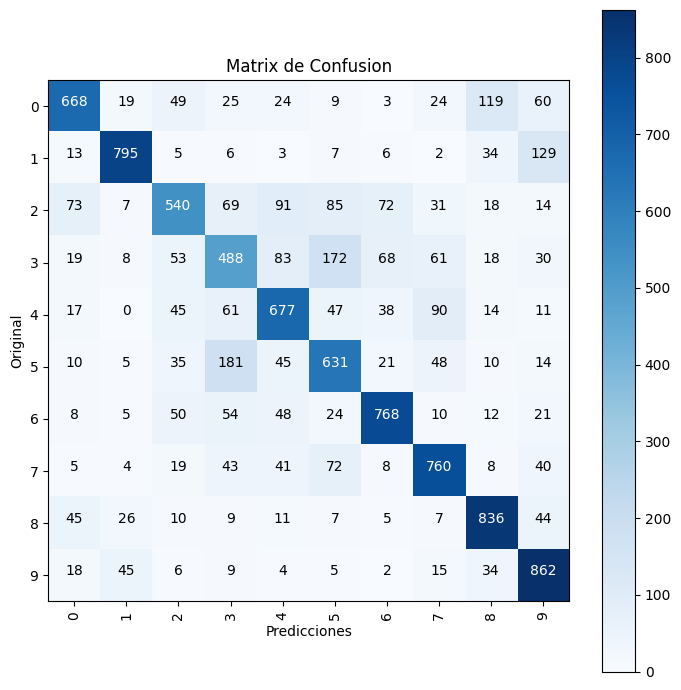

In [16]:
plot_confusion_matrix(cm, num_classes)